# CLASH ROYALE - PROJECT WEB - FINDING THE BEST DECK

<img src=https://asociacionempresarialesports.es/wp-content/uploads/clash-royale.jpg>


### Librerias

In [91]:
import numpy as np
import pandas as pd
import re
import requests
import http.client
import urllib
import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

## WEB SCRAPING

#### Como he comentado en el readme, de la web statsroyale.com extraeré las 8 mejores cartas por %Win Rate y por Popularidad y hacer una comparativa.

In [92]:
url = 'https://statsroyale.com/es/top/cards?type=ladder&arena=0'

html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')
print(soup)
    

<!DOCTYPE HTML>
<html lang="es">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<meta content="c8b1853ce105cdf4" name="yandex-verification"/>
<meta content="qwk9P8OId1j1bs1r92MboMwnO1VZIpxT8cJf3J0V" name="csrf-token"/>
<meta content="pages-topcards" name="view-name"/>
<meta content="Top Clash Royale Cards" property="og:description"/>
<meta content="//cdn.statsroyale.com/images/og.png" property="og:image"/>
<title>Top Clash Royale Cards</title>
<meta content="Top Clash Royale Cards" name="description"/>
<link href="//cdn.statsroyale.com/fonts.css?v=1582043813" rel="stylesheet"/>
<link href="//cdn.statsroyale.com/build.css?v=1582400659" rel="stylesheet"/>
<link href="//cdn.statsroyale.com/images/favicon/apple-touch-icon-180x180-precomposed.png" rel="apple-touch-icon-precomposed" sizes="180x180"/>
<link href="//cdn.statsroya

#### Después de obtener todo el contenido de esta página concreta de statsroyale.com, procedemos a limpiar y filtrar la web con los datos que queremos obtener.

In [93]:
winrate_cards = soup.find_all('div',{'class' : 'popularCards__card'})
print(winrate_cards)

[<div class="popularCards__card" data-usage="0.0" data-usage-change="10.99" data-winrate="0.0" data-winrate-change="58.59">
<div class="popularCards__row">
<a href="https://statsroyale.com/es/card/Knight"><img src="//cdn.statsroyale.com/images/cards/full/knight.png"/></a>
</div>
<div class="popularCards__row">Caballero</div>
<div class="popularCards__row">
<div class="popularCards__usageCaption">Porcentaje de Victorias</div>
<div class="popularCards__winrate">
0.0<span class="ui__headerSmall popularCards__percentage">%</span>
<div class="popularCards__negative">–58.59%</div>
</div>
<div class="popularCards__winrateChart" data-dates="02.21,02.22,02.23,02.24,02.25" data-metrics="58.59,59.21,59.22,60.31,0"></div>
</div>
<div class="popularCards__row">
<div class="popularCards__usageCaption">
Uso
</div>
<div class="popularCards__usage">
0.0<span class="ui__headerSmall popularCards__percentage">%</span>
<div class="popularCards__negative">–10.99%</div>
</div>
<div class="popularCards__usage

In [94]:
row_cards = [row.text.strip().split("\n") for row in winrate_cards]
print(row_cards)

[['Caballero', '', 'Porcentaje de Victorias', '', '0.0%', '–58.59%', '', '', '', '', '', 'Uso', '', '', '0.0%', '–10.99%', '', '', '', '', '', 'Crear mazo'], ['Duendes con lanza', '', 'Porcentaje de Victorias', '', '0.0%', '–61.24%', '', '', '', '', '', 'Uso', '', '', '0.0%', '–4.47%', '', '', '', '', '', 'Crear mazo'], ['Horno', '', 'Porcentaje de Victorias', '', '0.0%', '–53.39%', '', '', '', '', '', 'Uso', '', '', '0.0%', '–3.07%', '', '', '', '', '', 'Crear mazo'], ['Bárbaros', '', 'Porcentaje de Victorias', '', '0.0%', '–57.34%', '', '', '', '', '', 'Uso', '', '', '0.0%', '–3.01%', '', '', '', '', '', 'Crear mazo'], ['Duende gigante', '', 'Porcentaje de Victorias', '', '0.0%', '–50%', '', '', '', '', '', 'Uso', '', '', '0.0%', '–0.43%', '', '', '', '', '', 'Crear mazo'], ['Espejo', '', 'Porcentaje de Victorias', '', '0.0%', '–49.32%', '', '', '', '', '', 'Uso', '', '', '0.0%', '–2.26%', '', '', '', '', '', 'Crear mazo'], ['Gólem de hielo', '', 'Porcentaje de Victorias', '', '0.0%'

#### Se nos queda una clasificación de todas las cartas por %Win Rate y el porcentaje de uso de cada una 

Tenemos espacios vacíos y contenido que no necesitamos y lo limpiaremos despues de pasar los datos al DataFrame

Primero determinamos el nombre de las 22 columnas que tenemos

In [95]:
pd.set_option('display.max_rows', 100)

colnames = ['nombre_carta','u1','winrate','u2','%winrate','winrate_dif','u3','u4','u5','u6','u7','uso','u8','u9','%uso','uso_dif','u10','u11','u12','u13','u14','crear_mazo']

Creamos el DataFrame

In [96]:
croyale_cards_df = pd.DataFrame(row_cards[:], columns = colnames)

In [97]:
croyale_cards_df

,nombre_carta,u1,winrate,u2,%winrate,winrate_dif,u3,u4,u5,u6,...,u8,u9,%uso,uso_dif,u10,u11,u12,u13,u14,crear_mazo
0,Caballero,,Porcentaje de Victorias,,0.0%,–58.59%,,,,,...,,,0.0%,–10.99%,,,,,,Crear mazo
1,Duendes con lanza,,Porcentaje de Victorias,,0.0%,–61.24%,,,,,...,,,0.0%,–4.47%,,,,,,Crear mazo
2,Horno,,Porcentaje de Victorias,,0.0%,–53.39%,,,,,...,,,0.0%,–3.07%,,,,,,Crear mazo
3,Bárbaros,,Porcentaje de Victorias,,0.0%,–57.34%,,,,,...,,,0.0%,–3.01%,,,,,,Crear mazo
4,Duende gigante,,Porcentaje de Victorias,,0.0%,–50%,,,,,...,,,0.0%,–0.43%,,,,,,Crear mazo
5,Espejo,,Porcentaje de Victorias,,0.0%,–49.32%,,,,,...,,,0.0%,–2.26%,,,,,,Crear mazo
6,Gólem de hielo,,Porcentaje de Victorias,,0.0%,–50.63%,,,,,...,,,0.0%,–4.49%,,,,,,Crear mazo
7,Flechas,,Porcentaje de Victorias,,0.0%,–59.55%,,,,,...,,,0.0%,–22.56%,,,,,,Crear mazo
8,Electrocutadores,,Porcentaje de Victorias,,0.0%,–47.98%,,,,,...,,,0.0%,–0.41%,,,,,,Crear mazo
9,Valquiria,,Porcentaje de Victorias,,0.0%,–59.16%,,,,,...,,,0.0%,–28.6%,,,,,,Crear mazo


De este DataFrame, solo seleccionaré las columnas que me interesen ya que no las he podido limpiar previamente haciendo el Scraping.
Nos quedaremos con:
```
'nombre_carta'
'%winrate'
'winrate_dif' nos indica la diferencia entre el valor actual y el de la última actualización
'%uso'
'uso_dif' mismo concepto que con el winrate_dif`

```

In [98]:
winrate_cards_df_clean = croyale_cards_df[['nombre_carta','winrate_dif']]

In [99]:
winrate_ranking = winrate_cards_df_clean.sort_values(by = 'winrate_dif', ascending=False)

De toda esta clasificación nos quedaremos con las 8 primeras con mejor winrate para después compararlas con las 8 primeras con mayor uso y escoger las 4 cartas con mejor ratio.

In [100]:
top8_winrate_cards = winrate_ranking.iloc[:8]
top8_winrate_cards

,nombre_carta,winrate_dif
76,Bruja,–61.41%
91,Cazador,–61.27%
1,Duendes con lanza,–61.24%
16,Mosquetera,–60.84%
66,Esbirros,–60.75%
71,Arqueras,–60.67%
73,Príncipe,–60.65%
42,Bombardero,–60.56%


#### Repetimos la operación para obtener las cartas con mayor porcentaje de uso

In [101]:
mostused_cards_df_clean = croyale_cards_df[['nombre_carta','uso_dif']]
mostused_ranking = mostused_cards_df_clean.sort_values(by = 'uso_dif', ascending=False)
top8_mostused_cards = mostused_ranking.iloc[:8]
top8_mostused_cards

,nombre_carta,uso_dif
86,Torre infernal,–9.09%
10,Mago de hielo,–8.55%
69,Megaesbirro,–7.93%
25,Príncipe oscuro,–7.74%
91,Cazador,–7.67%
49,Bruja nocturna,–7.6%
64,Esqueleto gigante,–7.08%
77,Verdugo,–7.05%


Hacemos un merge con las dos tablas para tener las 8 mejores cartas por `%winrate` y las 8 mejores cartas por `%uso` en una misma tabla.
Antes de eso, voy a crear una nueva columna a la que llamare `id_carta` gracias al cual nos permitirá poder hacer este merge.

In [102]:
top8_winrate_cards.index = range(top8_winrate_cards.shape[0])
top8_mostused_cards.index = range(top8_mostused_cards.shape[0])

In [103]:
ids = pd.DataFrame({'id_carta': [1, 2, 3, 4, 5, 6, 7, 8]}, columns = ['id_carta'])

top8_winrate_cards = pd.concat([ids, top8_winrate_cards], axis=1,)
top8_mostused_cards = pd.concat([ids, top8_mostused_cards], axis=1,)


In [104]:
best8_df = pd.merge(top8_winrate_cards, top8_mostused_cards, on='id_carta')

In [105]:
best8_df

,id_carta,nombre_carta_x,winrate_dif,nombre_carta_y,uso_dif
0,1,Bruja,–61.41%,Torre infernal,–9.09%
1,2,Cazador,–61.27%,Mago de hielo,–8.55%
2,3,Duendes con lanza,–61.24%,Megaesbirro,–7.93%
3,4,Mosquetera,–60.84%,Príncipe oscuro,–7.74%
4,5,Esbirros,–60.75%,Cazador,–7.67%
5,6,Arqueras,–60.67%,Bruja nocturna,–7.6%
6,7,Príncipe,–60.65%,Esqueleto gigante,–7.08%
7,8,Bombardero,–60.56%,Verdugo,–7.05%


In [106]:
best8_df.info()

'''

cuando intentaba pasar las columnas de winrate_dif y uso_dif a formato numerico con pd.to_numeric, me borraba
los valores y los pasaba a NaN, por lo que la operación del ratio la he tenido que hacer manual

'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
id_carta          8 non-null int64
nombre_carta_x    8 non-null object
winrate_dif       8 non-null object
nombre_carta_y    8 non-null object
uso_dif           8 non-null object
dtypes: int64(1), object(4)
memory usage: 384.0+ bytes


'\n\ncuando intentaba pasar las columnas de winrate_dif y uso_dif a formato numerico con pd.to_numeric, me borraba\nlos valores y los pasaba a NaN, por lo que la operación del ratio la he tenido que hacer manual\n\n'

#### Pasaré a calcular el ratio de uso/winrate para cada carta de las top8 que tenemos en la tabla `best8_df` 

In [109]:
best8_df['use_win_ratio'][0] = ((9.09 / 61.41 ) * 100)
best8_df['use_win_ratio'][1] = ((8.55 / 61.27 ) * 100)
best8_df['use_win_ratio'][2] = ((7.93 / 61.24 ) * 100)
best8_df['use_win_ratio'][3] = ((7.74 / 60.84 ) * 100)
best8_df['use_win_ratio'][4] = ((7.67 / 60.75 ) * 100)
best8_df['use_win_ratio'][5] = ((7.6 / 60.67 ) * 100)
best8_df['use_win_ratio'][6] = ((7.08 / 60.65 ) * 100)
best8_df['use_win_ratio'][7] = ((7.05 / 60.56 ) * 100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [110]:
best8_df['use_win_ratio'] = pd.to_numeric(best8_df['use_win_ratio'], errors='coerce')

In [111]:
best8_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 6 columns):
id_carta          8 non-null int64
nombre_carta_x    8 non-null object
winrate_dif       8 non-null object
nombre_carta_y    8 non-null object
uso_dif           8 non-null object
use_win_ratio     8 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 768.0+ bytes


In [112]:
best8_df

,id_carta,nombre_carta_x,winrate_dif,nombre_carta_y,uso_dif,use_win_ratio
0,1,Bruja,–61.41%,Torre infernal,–9.09%,14.802149
1,2,Cazador,–61.27%,Mago de hielo,–8.55%,13.954627
2,3,Duendes con lanza,–61.24%,Megaesbirro,–7.93%,12.949053
3,4,Mosquetera,–60.84%,Príncipe oscuro,–7.74%,12.721893
4,5,Esbirros,–60.75%,Cazador,–7.67%,12.625514
5,6,Arqueras,–60.67%,Bruja nocturna,–7.6%,12.526784
6,7,Príncipe,–60.65%,Esqueleto gigante,–7.08%,11.673537
7,8,Bombardero,–60.56%,Verdugo,–7.05%,11.641347


In [113]:
best8_df_sorted = best8_df.sort_values(by = 'use_win_ratio', ascending=False)
best8_df_sorted

,id_carta,nombre_carta_x,winrate_dif,nombre_carta_y,uso_dif,use_win_ratio
0,1,Bruja,–61.41%,Torre infernal,–9.09%,14.802149
1,2,Cazador,–61.27%,Mago de hielo,–8.55%,13.954627
2,3,Duendes con lanza,–61.24%,Megaesbirro,–7.93%,12.949053
3,4,Mosquetera,–60.84%,Príncipe oscuro,–7.74%,12.721893
4,5,Esbirros,–60.75%,Cazador,–7.67%,12.625514
5,6,Arqueras,–60.67%,Bruja nocturna,–7.6%,12.526784
6,7,Príncipe,–60.65%,Esqueleto gigante,–7.08%,11.673537
7,8,Bombardero,–60.56%,Verdugo,–7.05%,11.641347


#### Tal y como me habia planteado al inicio del proyecto, de esta clasificación de mejores cartas nos quedaremos con las 4 primeras cartas con mejor ratio.

Las cartas seleccionadas són:

                                                    BRUJA
<img src=https://i.pinimg.com/originals/d8/ec/86/d8ec860f594559cb7a9c494bc9598cef.png> 

                                                   CAZADOR
<img src=https://vignette.wikia.nocookie.net/clashroyale/images/6/64/HunterCard.png >

                                                DUENDES CON LANZA
<img src=https://i.pinimg.com/originals/1c/37/1d/1c371d9d97bb7d19670086c9e07bcd9c.png>

                                                  MOSQUETERA
<img src=https://vignette.wikia.nocookie.net/clashroyale/images/e/ee/MusketeerCard.png >


#### Una vez tenemos las cuatro cartas con mejor ratio, nos iremos a la web `https://deckbandit.com` la cual nos ofrece la mejor opción de mazo, añadiéndonos las cuatro mejores cartas que nos faltarían para tener las 8 necesarias para jugar.

#### La web nos proporciona este mazo incluyendo nuestras 4 cartas extraídas del estudio y 4 más recomendadas por la web

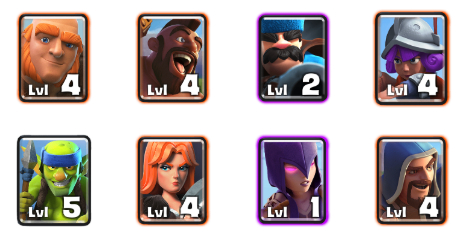

## API

#### Ahora en la API, RoyaleApi, introduciremos este mazo, para que nos proporcione información sobre el mismo:



-Cantidad de veces usado ese mazo en el juego

-Victorias netas (derrotando las 3 torres) 

-Victorias (mínimo una torre destruida, es decir, 1-0, 2-1) 

-Empates 

-Derrotas 

In [121]:
headers = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
initial_endpoint = 'https://royaleapi.com/decks/stats/bandit,battle-ram,electro-wizard,magic-archer,pekka,poison,royal-ghost,zap'


In [122]:
flattened_data = pd.DataFrame()
response = requests.get(initial_endpoint,headers=headers)
results = response.json()
results

JSONDecodeError: Expecting value: line 1 column 1 (char 0)